# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

# Read the data

In [2]:
flights=pd.read_csv(r"C:\Users\MY\Documents\Python Scripts\codeclause intern projects\codeclause intern -flight delay prediction\flights.csv")
flights

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,Envoy Air


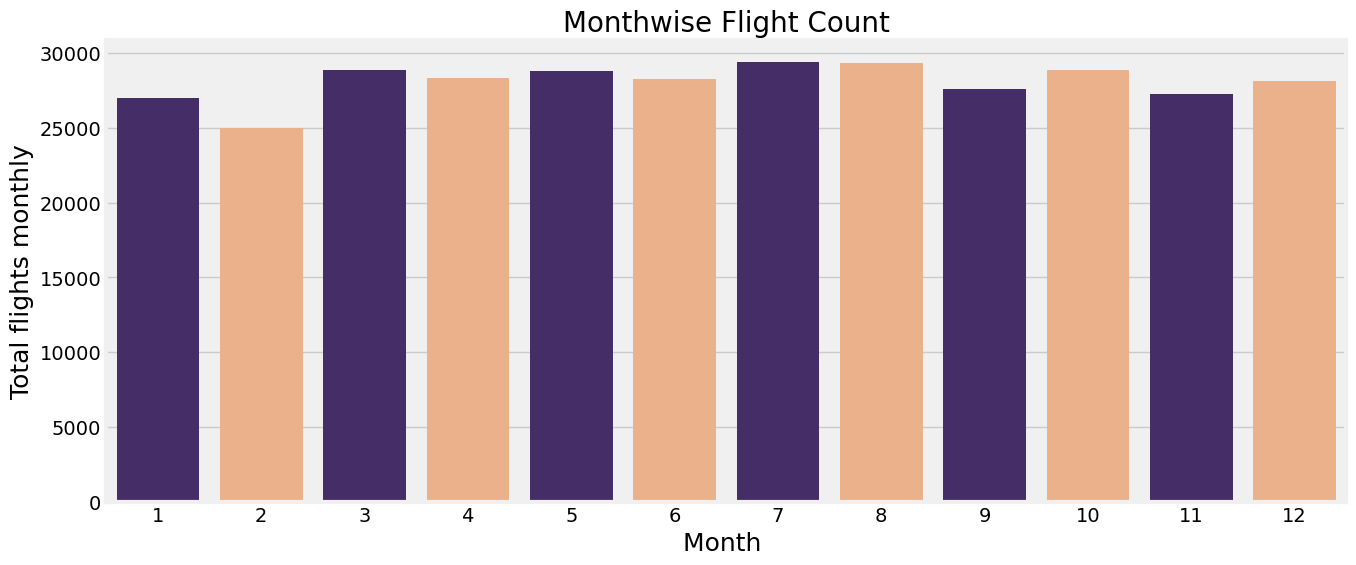

In [3]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x = flights['month'], palette=['#432371',"#FAAE7B"])
ax.set_xlabel (xlabel='Month ', fontsize=18)
ax.set_ylabel(ylabel ="Total flights monthly",fontsize=18)
ax.set_title(label='Monthwise Flight Count' ,fontsize=20)
plt .show()

# Cleaning the data

In [4]:

flights1=flights.drop(['year','tailnum','flight','carrier','distance','air_time','hour','minute','time_hour','origin','dest'],axis=1)
flights1.head()

,id,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,name
0,0,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.
1,1,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.
2,2,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.
3,3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways
4,4,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.


In [5]:
# arr_delay should not have null data so missing values in target are removed

flights1.dropna(subset= ['arr_delay'], inplace = True)

In [6]:
# dep_delay should not have null data so missing values in target are removed

flights1.dropna(subset= ['dep_delay'], inplace = True)

In [7]:
flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   name            327346 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 27.5+ MB


In [8]:
# All the null data are removed

flights1.isnull().sum()

id                0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
name              0
dtype: int64

# Correlation

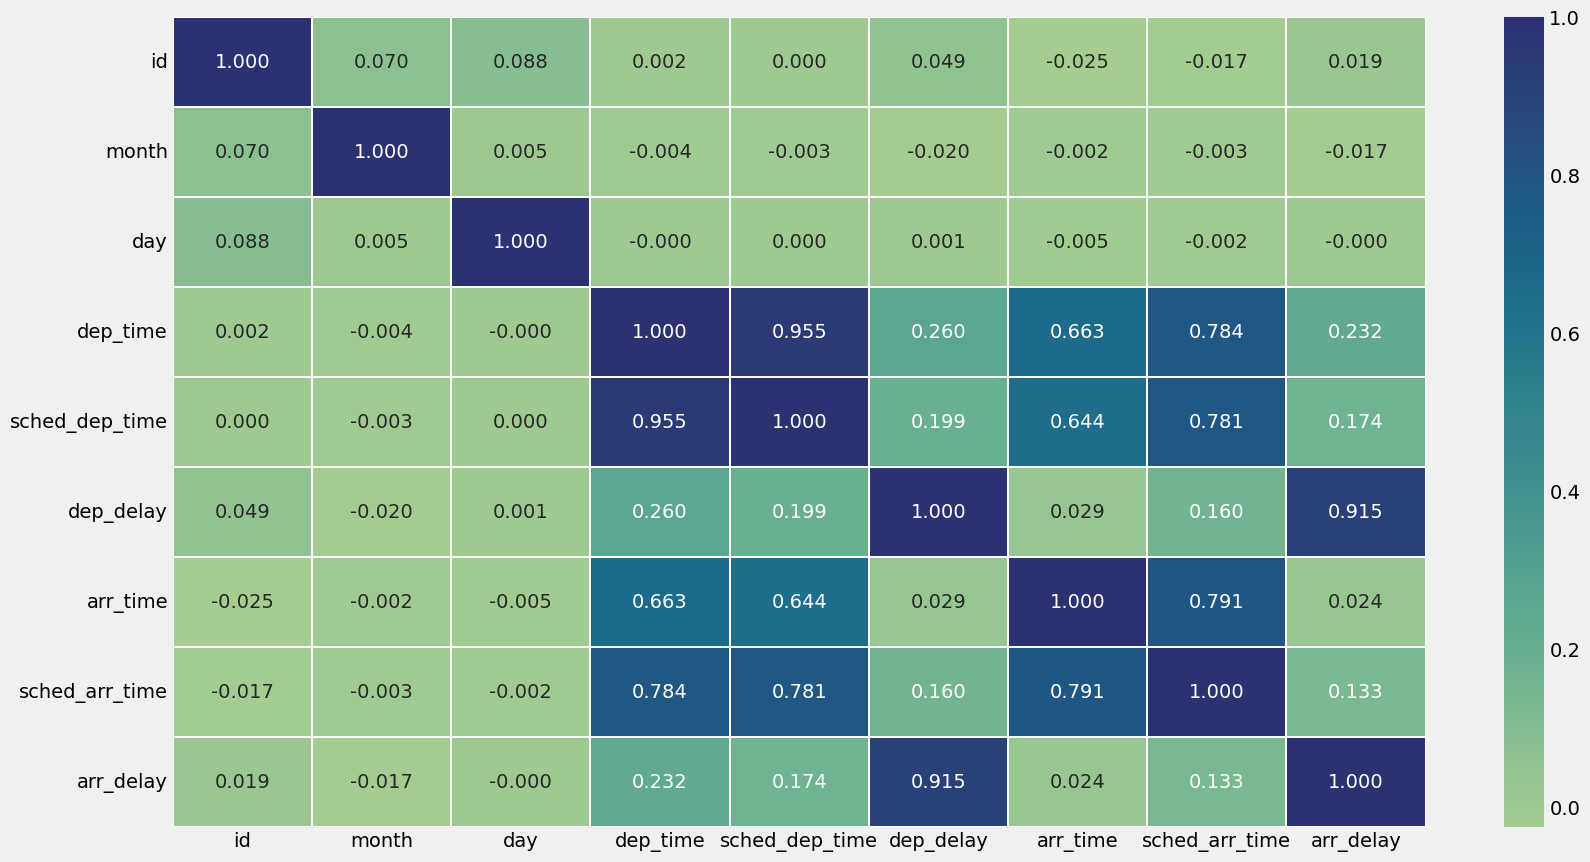

In [9]:
# Correlation Between Different Columns:

num_flights1 = flights1.select_dtypes(include=['number'])
plt.figure(figsize=(18, 10))
sns.heatmap(num_flights1.corr(), annot=True, fmt=".3f", linewidth=.3, cmap='crest');

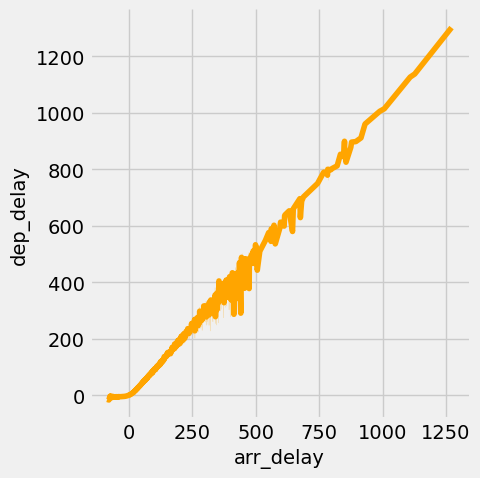

In [10]:
# Relation between departure delay and arrival delay of flights

sns.relplot(data=flights1 , x= 'arr_delay' , y= 'dep_delay' , kind= 'line', color='orange');

# Visualing the data

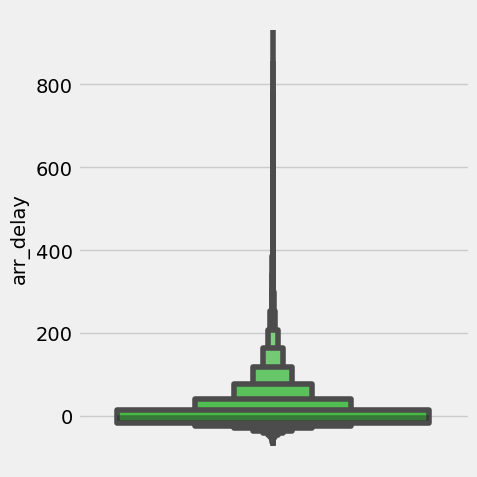

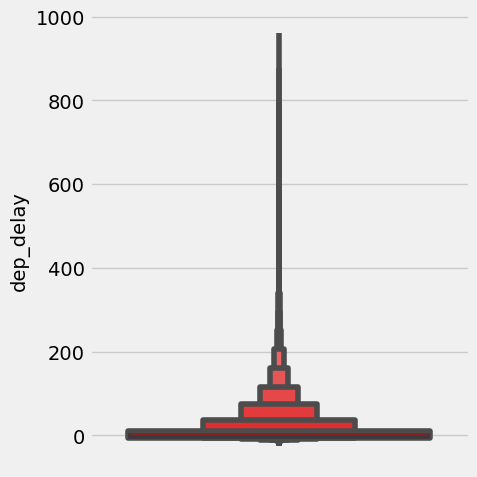

In [11]:
#boxen plots: To measure major delay & minor delay
# Majority of flights had minor delays

arrive_delay = sns.catplot(data=flights1 , y = 'arr_delay', kind = 'boxen', showfliers = False,  color='limegreen')
departure_delay = sns.catplot(data=flights1 , y = 'dep_delay', kind = 'boxen',  showfliers = False,  color='red' )

[Text(0.5, 0, 'dep_delay (min)')]

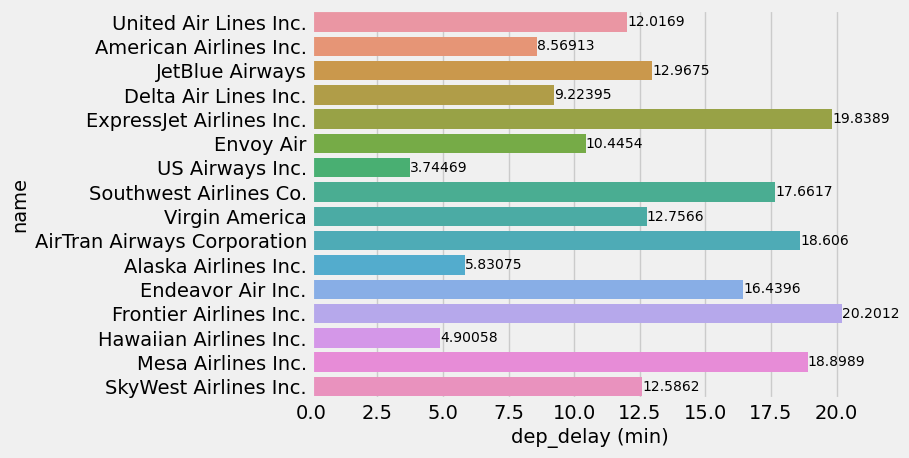

In [12]:
# Departure delay - Airlineswise

ax = sns.barplot(flights1, x='dep_delay', y='name', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='dep_delay (min)')

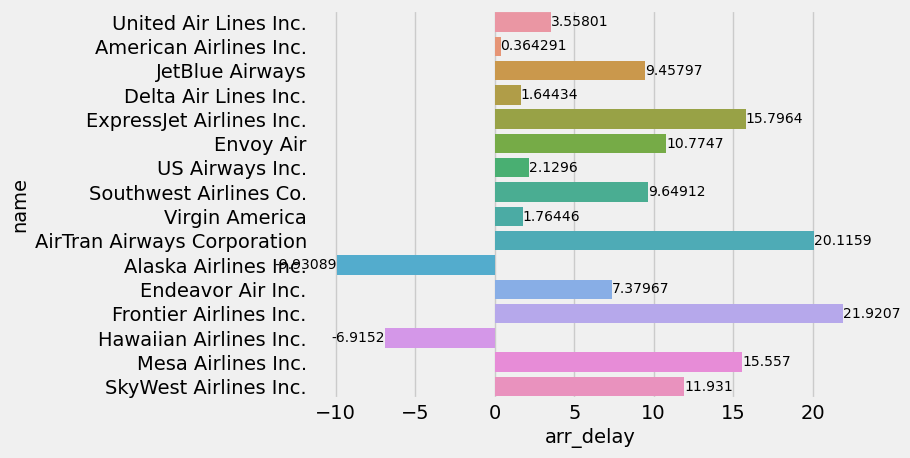

In [13]:
# Arrival delay - Airlineswise

ax = sns.barplot(flights1, x='arr_delay', y='name', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

# Data Pre-processing

In [14]:

flights1['arr_delay'].value_counts()


-13.0      7177
-10.0      7088
-12.0      7046
-14.0      6975
-11.0      6863
           ... 
 435.0        1
 456.0        1
 428.0        1
 516.0        1
 1007.0       1
Name: arr_delay, Length: 577, dtype: int64

In [15]:
# Split the data into positive and negative

positive_rows = flights1.arr_delay == 1.0
data_pos = flights1.loc[positive_rows]
data_neg = flights1.loc[~positive_rows]

In [16]:
# Merge the balanced data

flights1= pd.concat([data_pos, data_neg.sample(n = len(data_pos))], axis = 0)

In [17]:
# Shuffle the order of data

flights1 = flights1.sample(n = len(flights1)).reset_index(drop = True)

In [18]:
flights1.isna().sum()

id                0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
name              0
dtype: int64

In [19]:
flights1 = flights1.dropna(axis=0)

flights1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10150 non-null  int64  
 1   month           10150 non-null  int64  
 2   day             10150 non-null  int64  
 3   dep_time        10150 non-null  float64
 4   sched_dep_time  10150 non-null  int64  
 5   dep_delay       10150 non-null  float64
 6   arr_time        10150 non-null  float64
 7   sched_arr_time  10150 non-null  int64  
 8   arr_delay       10150 non-null  float64
 9   name            10150 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 793.1+ KB


In [20]:
flights1['arr_delay'] = flights1['arr_delay'].astype(int)

flights1.shape

(10150, 10)

# Exploratory Data Analysis

In [21]:

flights1.describe()

,id,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay
count,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000
mean,162738.838030,6.562365,15.734187,1319.638227,1317.623153,7.209163,1491.281675,1508.975665,4.016355
std,96888.702481,3.494602,8.718413,483.645614,468.999045,29.318651,515.891940,496.653389,31.353174
min,12.000000,1.000000,1.000000,1.000000,500.000000,-19.000000,1.000000,1.000000,-66.000000
25%,78143.500000,4.000000,8.000000,855.000000,900.000000,-5.000000,1059.000000,1110.000000,-5.000000
50%,158960.500000,7.000000,16.000000,1333.000000,1329.000000,-1.000000,1514.000000,1524.500000,1.000000
75%,245632.000000,10.000000,23.000000,1723.000000,1713.000000,7.000000,1927.000000,1928.750000,1.000000
max,336768.000000,12.000000,31.000000,2400.000000,2359.000000,423.000000,2400.000000,2359.000000,474.000000


In [22]:
# Encoding the categorical variable

result=[]

for row in flights1['arr_delay']:
    if row > 5 :
        result.append(1)
    else:
        result.append(0)

flights1['result']= result

flights1

,id,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,name,result
0,190074,4,27,1123.0,1135,-12.0,1256.0,1255,1,Envoy Air,0
1,148581,3,14,858.0,900,-2.0,1150.0,1216,-26,United Air Lines Inc.,0
2,178188,4,14,2016.0,1900,76.0,2341.0,2245,56,JetBlue Airways,1
3,189999,4,27,926.0,932,-6.0,1030.0,1042,-12,JetBlue Airways,0
4,282944,8,4,1029.0,1030,-1.0,1249.0,1248,1,Delta Air Lines Inc.,0
...,...,...,...,...,...,...,...,...,...,...,...
10145,125691,2,17,1551.0,1540,11.0,1918.0,1917,1,Delta Air Lines Inc.,0
10146,146697,3,12,955.0,1000,-5.0,1252.0,1251,1,United Air Lines Inc.,0
10147,614,1,1,1740.0,1630,70.0,2102.0,1954,68,Delta Air Lines Inc.,1
10148,25410,1,30,946.0,950,-4.0,1045.0,1104,-19,JetBlue Airways,0


In [23]:
# Remove few more non-contributing features from the Data frame

#flights_arr=flights1.drop(['dep_time','arr_time','name'],axis=1)

flights1=flights1.drop(['dep_time','arr_time', 'arr_delay','name'],axis=1)

flights1

,id,month,day,sched_dep_time,dep_delay,sched_arr_time,result
0,190074,4,27,1135,-12.0,1255,0
1,148581,3,14,900,-2.0,1216,0
2,178188,4,14,1900,76.0,2245,1
3,189999,4,27,932,-6.0,1042,0
4,282944,8,4,1030,-1.0,1248,0
...,...,...,...,...,...,...,...
10145,125691,2,17,1540,11.0,1917,0
10146,146697,3,12,1000,-5.0,1251,0
10147,614,1,1,1630,70.0,1954,1
10148,25410,1,30,950,-4.0,1104,0


In [24]:
# Normalise the input features by dropping the output column

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=flights1.drop(columns='result')
y=flights1['result']
x=sc.fit_transform(x)

# Modelling with different types of Classifiers

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
clf.score(x_test,y_test)

0.8147783251231527

# RandomForestClassifier

In [28]:
# RandomForestClassifier Modelling

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
rf.score(x_test,y_test)

0.8862068965517241

 # catboost Modelling

In [30]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Create and train the CatBoost model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=10)
catboost_model.fit(x_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(x_test)

# Evaluate the model
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("CatBoost Model:")
print(f"Mean Absolute Error: {mae_catboost}")
print(f"R-squared: {r2_catboost}")

0:	learn: 0.3656496	total: 163ms	remaining: 2m 42s
10:	learn: 0.3067938	total: 249ms	remaining: 22.4s
20:	learn: 0.2959943	total: 339ms	remaining: 15.8s
30:	learn: 0.2928024	total: 499ms	remaining: 15.6s
40:	learn: 0.2905386	total: 605ms	remaining: 14.1s
50:	learn: 0.2890907	total: 693ms	remaining: 12.9s
60:	learn: 0.2878274	total: 817ms	remaining: 12.6s
70:	learn: 0.2864328	total: 903ms	remaining: 11.8s
80:	learn: 0.2854365	total: 976ms	remaining: 11.1s
90:	learn: 0.2842936	total: 1.04s	remaining: 10.4s
100:	learn: 0.2829702	total: 1.1s	remaining: 9.8s
110:	learn: 0.2819434	total: 1.15s	remaining: 9.2s
120:	learn: 0.2806352	total: 1.2s	remaining: 8.68s
130:	learn: 0.2794553	total: 1.25s	remaining: 8.28s
140:	learn: 0.2780973	total: 1.3s	remaining: 7.95s
150:	learn: 0.2768074	total: 1.35s	remaining: 7.61s
160:	learn: 0.2756899	total: 1.4s	remaining: 7.29s
170:	learn: 0.2743433	total: 1.45s	remaining: 7.01s
180:	learn: 0.2732089	total: 1.51s	remaining: 6.86s
190:	learn: 0.2716361	total:

# XGBClassifier

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier

In [33]:
xg= XGBClassifier(random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')
xg.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [34]:
xg.score(x_test,y_test)

0.8837438423645321

In [35]:
# Both RandomForest Classifier and XGB Classifier gives better validation set accuracy values than other models

In [36]:
# Both RandomForest and XGB classifiers Validation Set accuracy results are very closest value with each other

In [37]:
# Let us try Hyperparameter tuning for both the classifiers to findout the best suitable model

# Hyperparameter Tuning for XGB Classifier

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report

# function to quickly evaluate effect of different hyperparameters
def test_params_xgbc(**params):
    model = XGBClassifier(random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss', **params).fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)
    val_accuracy = model.score(x_test, y_test)
    roc_auc_score_lr = roc_auc_score(y_test, model.predict(x_test))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

In [39]:
test_params_xgbc(n_estimators = 10)

Train set accuracy: 90.70%
Validation set Accuracy: 89.06%
roc auc score: 0.72


In [40]:
test_params_xgbc(n_estimators = 10, max_depth = 7, learning_rate = 0.5)

Train set accuracy: 91.28%
Validation set Accuracy: 89.01%
roc auc score: 0.72


In [41]:
xg= XGBClassifier(n_estimators = 10, max_depth = 7, learning_rate = 0.5 ,random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')
xg.fit(x_train , y_train)

xg.score(x_test,y_test)

0.8901477832512316

# Hyperparameter Tuning for RandomForest Classifier

In [42]:
# function to quickly evaluate effect of different hyperparameters
def test_params_rfc(**params):
    model = RandomForestClassifier(n_jobs = -1, random_state = 42, **params).fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)
    val_accuracy = model.score(x_test, y_test)
    roc_auc_score_lr = roc_auc_score(y_test, model.predict(x_test))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

In [43]:
#Let's look at influence of number of estimators

test_params_rfc(n_estimators = 5)

Train set accuracy: 98.02%
Validation set Accuracy: 87.00%
roc auc score: 0.72


In [44]:
test_params_rfc(n_estimators = 25)

Train set accuracy: 99.63%
Validation set Accuracy: 88.28%
roc auc score: 0.71


In [45]:
# check what effect max_depth can make

test_params_rfc(n_estimators = 25, max_depth = 5)

Train set accuracy: 89.59%
Validation set Accuracy: 89.41%
roc auc score: 0.72


In [46]:
test_params_rfc(n_estimators = 25, max_depth = 7)

Train set accuracy: 90.07%
Validation set Accuracy: 89.16%
roc auc score: 0.71


In [47]:
# check effect of max_leaf_nodes

test_params_rfc(n_estimators = 20, max_leaf_nodes = 32)

Train set accuracy: 89.64%
Validation set Accuracy: 89.41%
roc auc score: 0.72


In [48]:
# check min_samples_leaf and its effect

test_params_rfc(n_estimators = 20, min_samples_leaf = 2 )

Train set accuracy: 95.41%
Validation set Accuracy: 88.77%
roc auc score: 0.72


In [49]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 50)

Train set accuracy: 89.37%
Validation set Accuracy: 89.46%
roc auc score: 0.72


In [50]:
rfc_best = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 20, min_samples_leaf = 50)
rfc_best.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=20, n_jobs=-1,
                       random_state=42)

In [51]:
rfc_best.score(x_test,y_test)

0.8945812807881773

Train set accuracy: 89.37%
Validation set Accuracy: 89.46%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1681
           1       0.86      0.46      0.60       349

    accuracy                           0.89      2030
   macro avg       0.88      0.72      0.77      2030
weighted avg       0.89      0.89      0.88      2030

roc auc score: 0.72


<Axes: title={'center': 'Validation Confusion Matrix'}>

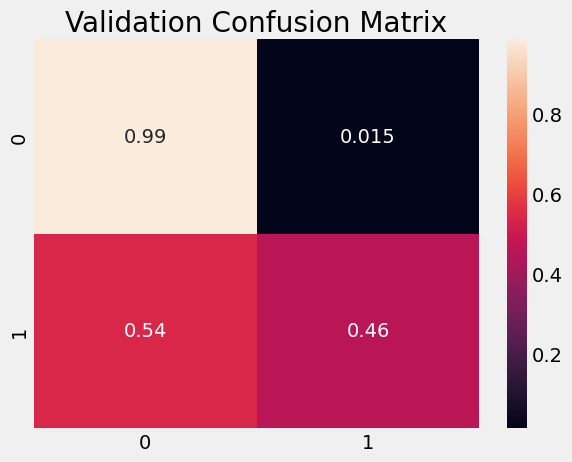

In [52]:

train_preds = rfc_best.predict(x_train)
test_preds = rfc_best.predict(x_test)
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_test, test_preds)
print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100 ))
print('Validation Classification report: \n', classification_report(y_test, test_preds))
print('roc auc score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))  
conf_matrix =  confusion_matrix(y_test, test_preds, normalize = 'true')
plt.figure()
plt.title('Validation Confusion Matrix')
sns.heatmap(conf_matrix, annot = True)

In [53]:
# As above results suggests that RandomForest Classifier gives better  to the model for this flights dataset given